In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# loading the dataset
data = pd.read_csv('../data/gurgaon_properties_cleaned(round1).csv')

In [4]:
data.head(1)

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,house,independent,sector 50,5.0,215517.0,232.0,Plot area 2(1011.71 sq.m.),6,5,3+,"pooja room,study room,servant room,others",2.0,not available,0 to 1 Year Old,"['Standard chartered ATM', 'Icici bank ATM', 'Vatsalya Clinic', 'Bones Clinic - Orthopaedics', 'Meher Clinic', 'Dr. Naresh Pandita', 'Dr. Anuj Sharma', 'Vishesh Dental', 'Skin Clinic', 'Neelkanth Health Care', 'Park Hospital Gurgaon', 'Divine Look Clinic Centre', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Best Urologist Atcomplete Family Clinic', 'Sukhmani Hospital Pvt. Ltd', 'Ekta Hospital', 'Sai Heart and Trauma Center', 'Wembley estate club', 'Genius', 'Gardian Pharmacy', 'Apollo Pharmacy', 'SPAZE BUSINESS PARK', 'Unitech', 'India Oil', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'Indusind bank', 'Hdfc bank', 'SRS Cinemas', 'India', 'Madison and Pike', 'Haldiram', ""Domino's Pizza"", ""Nirula's"", 'Starbucks', 'Nook', 'Kamla International', 'Gurugram University', 'Delhi Public School Primary Section', 'Amity Global School', 'Manav Rachna School', 'Manav Rachna Swimming Pool']","['1 Fan', '1 Exhaust Fan', '1 Dining Table', '1 Geyser', '1 Light', '1 AC', '1 Chimney', '1 Curtains', '1 TV', '1 Wardrobe', '1 Microwave', 'No Bed', 'No Modular Kitchen', 'No Fridge', 'No Sofa', 'No Stove', 'No Washing Machine', 'No Water Purifier']",NaN


Working on columns: - 
1. areaWithType, 
2. additionalRoom, 
3. agePossession, 
4. furnishDetails, 
5. features

### **1. areaWithType column**

In [5]:
data.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
792,2.01,1546.0,Plot area 1549(143.91 sq.m.)
3625,6.50,3500.0,Carpet area: 3500 (325.16 sq.m.)
81,1.64,1956.0,Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.)
656,1.23,1997.0,Super Built up area 1997(185.53 sq.m.)
2791,1.00,1225.0,Built Up area: 1250 (116.13 sq.m.)Carpet area: 915 sq.ft. (85.01 sq.m.)


In [6]:
# creating function to extract 'Super Build up area'
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [7]:
# Creating function extract 'Built Up area' or 'Carpet area'
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# Creating a function that checks the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [9]:
# Extract Super Built up area and convert to sqft if needed
data['super_built_up_area'] = data['areaWithType'].apply(get_super_built_up_area)
data['super_built_up_area'] = data.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
data['built_up_area'] = data['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
data['built_up_area'] = data.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
data['carpet_area'] = data['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
data['carpet_area'] = data.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [10]:
data[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
94,0.50,flat,1300.0,Built Up area: 1300 (120.77 sq.m.),NaN,1300.0,NaN
3495,6.30,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
628,0.68,flat,824.0,Carpet area: 824 (76.55 sq.m.),NaN,NaN,824.0
1282,1.05,flat,1765.0,Super Built up area 1765(163.97 sq.m.),1765.0,NaN,NaN
3050,0.88,flat,1385.0,Super Built up area 1385(128.67 sq.m.)Built Up area: 1120 sq.ft. (104.05 sq.m.)Carpet area: 1040 sq.ft. (96.62 sq.m.),1385.0,1120.0,1040.0


In [11]:
data[data['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,5.00,house,215517.0,Plot area 2(1011.71 sq.m.),NaN,NaN,NaN
8,3.90,house,1836.0,Plot area 204(170.57 sq.m.),NaN,NaN,NaN
15,0.85,house,67.0,Plot area 67(6.22 sq.m.),NaN,NaN,NaN
31,6.75,house,232.0,Plot area 232(21.55 sq.m.),NaN,NaN,NaN
32,3.75,house,1467.0,Plot area 163(136.29 sq.m.),NaN,NaN,NaN


In [12]:
all_null_df = data[((data['super_built_up_area'].isnull()) & (data['built_up_area'].isnull()) & (data['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [13]:
all_null_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,5.00,house,215517.0,Plot area 2(1011.71 sq.m.),NaN,NaN,NaN
8,3.90,house,1836.0,Plot area 204(170.57 sq.m.),NaN,NaN,NaN
15,0.85,house,67.0,Plot area 67(6.22 sq.m.),NaN,NaN,NaN
31,6.75,house,232.0,Plot area 232(21.55 sq.m.),NaN,NaN,NaN
32,3.75,house,1467.0,Plot area 163(136.29 sq.m.),NaN,NaN,NaN


In [14]:
all_null_index = data[((data['super_built_up_area'].isnull()) & (data['built_up_area'].isnull()) & (data['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [15]:
all_null_index

Index([   0,    8,   15,   31,   32,   64,   67,   90,   93,  107,
       ...
       3766, 3767, 3768, 3783, 3794, 3795, 3799, 3800, 3803, 3804],
      dtype='int64', length=558)

In [16]:
# Creating a function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [17]:
# replacing the nan values in build_up_area to the extracted values of plot area
all_null_df['built_up_area'] = all_null_df['areaWithType'].apply(extract_plot_area)

In [18]:
all_null_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,5.00,house,215517.0,Plot area 2(1011.71 sq.m.),NaN,2.00,NaN
8,3.90,house,1836.0,Plot area 204(170.57 sq.m.),NaN,204.00,NaN
15,0.85,house,67.0,Plot area 67(6.22 sq.m.),NaN,67.00,NaN
31,6.75,house,232.0,Plot area 232(21.55 sq.m.),NaN,232.00,NaN
32,3.75,house,1467.0,Plot area 163(136.29 sq.m.),NaN,163.00,NaN
64,2.90,house,2700.0,Plot area 2700(250.84 sq.m.),NaN,2700.00,NaN
67,5.00,house,4950.0,Plot area 550(459.87 sq.m.),NaN,550.00,NaN
90,31.50,house,9000.0,Plot area 1000(836.13 sq.m.),NaN,1000.00,NaN
93,4.00,house,2400.0,Plot area 2400(222.97 sq.m.),NaN,2400.00,NaN
107,3.60,house,1728.0,Plot area 192(160.54 sq.m.),NaN,192.00,NaN


In [19]:
# Creating a function to convert the scale 
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [20]:
all_null_df['built_up_area'] = all_null_df.apply(convert_scale,axis=1)

In [21]:
all_null_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,5.00,house,215517.0,Plot area 2(1011.71 sq.m.),NaN,2.00,NaN
8,3.90,house,1836.0,Plot area 204(170.57 sq.m.),NaN,1836.00,NaN
15,0.85,house,67.0,Plot area 67(6.22 sq.m.),NaN,67.00,NaN
31,6.75,house,232.0,Plot area 232(21.55 sq.m.),NaN,232.00,NaN
32,3.75,house,1467.0,Plot area 163(136.29 sq.m.),NaN,1467.00,NaN
64,2.90,house,2700.0,Plot area 2700(250.84 sq.m.),NaN,2700.00,NaN
67,5.00,house,4950.0,Plot area 550(459.87 sq.m.),NaN,4950.00,NaN
90,31.50,house,9000.0,Plot area 1000(836.13 sq.m.),NaN,9000.00,NaN
93,4.00,house,2400.0,Plot area 2400(222.97 sq.m.),NaN,2400.00,NaN
107,3.60,house,1728.0,Plot area 192(160.54 sq.m.),NaN,1728.00,NaN


In [22]:
# updating the original dataset
data.update(all_null_df)

In [23]:
data.isnull().sum()

property_type             0
society                   0
sector                    0
price                    18
area                     18
price_per_sqft           18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                  96
additionalRoom            0
floorNum                 19
facing                  846
agePossession             1
nearbyLocations         176
furnishDetails          983
features                635
super_built_up_area    1900
built_up_area          2070
carpet_area            1871
dtype: int64

In [24]:
data.head(3)

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,house,independent,sector 50,5.00,215517.0,232.0,Plot area 2(1011.71 sq.m.),6,5,3+,"pooja room,study room,servant room,others",2.0,not available,0 to 1 Year Old,"['Standard chartered ATM', 'Icici bank ATM', 'Vatsalya Clinic', 'Bones Clinic - Orthopaedics', 'Meher Clinic', 'Dr. Naresh Pandita', 'Dr. Anuj Sharma', 'Vishesh Dental', 'Skin Clinic', 'Neelkanth Health Care', 'Park Hospital Gurgaon', 'Divine Look Clinic Centre', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Best Urologist Atcomplete Family Clinic', 'Sukhmani Hospital Pvt. Ltd', 'Ekta Hospital', 'Sai Heart and Trauma Center', 'Wembley estate club', 'Genius', 'Gardian Pharmacy', 'Apollo Pharmacy', 'SPAZE BUSINESS PARK', 'Unitech', 'India Oil', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'Indusind bank', 'Hdfc bank', 'SRS Cinemas', 'India', 'Madison and Pike', 'Haldiram', ""Domino's Pizza"", ""Nirula's"", 'Starbucks', 'Nook', 'Kamla International', 'Gurugram University', 'Delhi Public School Primary Section', 'Amity Global School', 'Manav Rachna School', 'Manav Rachna Swimming Pool']","['1 Fan', '1 Exhaust Fan', '1 Dining Table', '1 Geyser', '1 Light', '1 AC', '1 Chimney', '1 Curtains', '1 TV', '1 Wardrobe', '1 Microwave', 'No Bed', 'No Modular Kitchen', 'No Fridge', 'No Sofa', 'No Stove', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,2.0,NaN
1,flat,dlf regal gardens,sector 90,1.29,1430.0,9020.0,Super Built up area 1702(158.12 sq.m.)Built Up area: 1540 sq.ft. (143.07 sq.m.)Carpet area: 1430 sq.ft. (132.85 sq.m.),3,3,3,study room,7.0,East,1 to 5 Year Old,"['SS Omnia, Sector 86', 'Numberdar market, IMT Manesar', ""Sodhi's Supermarket, Sector 82"", 'RPS International School', 'RHM Public School', 'ICICI Bank ATM, Sector 86', 'Silver Streak Multi Speciality', 'Aarvy Healthcare Super Speciality', 'Miracles Apollo Cradle Hospital', 'HDFC Bank, Pataudi Rd', 'Canara Bank - Nawada Fatehpur', 'State Bank of India', 'Minda Industries Nawada Fatehpur', 'Holiday Inn Gurugram Sector 90', 'M3M SCO Shop cum Office']",NaN,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1702.0,1540.0,1430.0
2,flat,ireo the grand arch,sector 58,2.20,1375.0,16000.0,Carpet area: 1375 (127.74 sq.m.),2,2,1,pooja room,5.0,East,1 to 5 Year Old,"['Sector 55-56 Rapid Metro', 'Paras Trinity Mall', 'Rajesh Pilot Road', 'Shalom Presidency School', 'Sushant University', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'International Tech Park Gurgaon', 'Grand Hyatt Gurgaon', 'Grand Hyatt Gurgaon', 'Jinga Lala Theme Park Gurgaon Delhi', 'TERI Golf Course', 'Tau DeviLal Sports Complex']","['6 Fan', '1 Exhaust Fan', '3 Geyser', '5 Light', '2 AC', '1 Chimney', '1 Modular Kitchen', '2 Wardrobe', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,1375.0


### **2. additionalRoom column**

In [25]:
data['additionalRoom'].value_counts()

additionalRoom
not available                                    1588
servant room                                      706
study room                                        250
others                                            226
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      75
servant room,others                                60
pooja room,study room,servant room                 56
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [26]:
# list of new columns required
new_columns = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_columns:
    data[col] = data['additionalRoom'].str.contains(col).astype(int)

In [27]:
data.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
157,servant room,0,1,0,0,0
765,servant room,0,1,0,0,0
686,servant room,0,1,0,0,0
1124,servant room,0,1,0,0,0
3789,servant room,0,1,0,0,0


In [28]:
data.head(2)

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,independent,sector 50,5.00,215517.0,232.0,Plot area 2(1011.71 sq.m.),6,5,3+,"pooja room,study room,servant room,others",2.0,not available,0 to 1 Year Old,"['Standard chartered ATM', 'Icici bank ATM', 'Vatsalya Clinic', 'Bones Clinic - Orthopaedics', 'Meher Clinic', 'Dr. Naresh Pandita', 'Dr. Anuj Sharma', 'Vishesh Dental', 'Skin Clinic', 'Neelkanth Health Care', 'Park Hospital Gurgaon', 'Divine Look Clinic Centre', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Best Urologist Atcomplete Family Clinic', 'Sukhmani Hospital Pvt. Ltd', 'Ekta Hospital', 'Sai Heart and Trauma Center', 'Wembley estate club', 'Genius', 'Gardian Pharmacy', 'Apollo Pharmacy', 'SPAZE BUSINESS PARK', 'Unitech', 'India Oil', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'Indusind bank', 'Hdfc bank', 'SRS Cinemas', 'India', 'Madison and Pike', 'Haldiram', ""Domino's Pizza"", ""Nirula's"", 'Starbucks', 'Nook', 'Kamla International', 'Gurugram University', 'Delhi Public School Primary Section', 'Amity Global School', 'Manav Rachna School', 'Manav Rachna Swimming Pool']","['1 Fan', '1 Exhaust Fan', '1 Dining Table', '1 Geyser', '1 Light', '1 AC', '1 Chimney', '1 Curtains', '1 TV', '1 Wardrobe', '1 Microwave', 'No Bed', 'No Modular Kitchen', 'No Fridge', 'No Sofa', 'No Stove', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,2.0,NaN,1,1,0,1,1
1,flat,dlf regal gardens,sector 90,1.29,1430.0,9020.0,Super Built up area 1702(158.12 sq.m.)Built Up area: 1540 sq.ft. (143.07 sq.m.)Carpet area: 1430 sq.ft. (132.85 sq.m.),3,3,3,study room,7.0,East,1 to 5 Year Old,"['SS Omnia, Sector 86', 'Numberdar market, IMT Manesar', ""Sodhi's Supermarket, Sector 82"", 'RPS International School', 'RHM Public School', 'ICICI Bank ATM, Sector 86', 'Silver Streak Multi Speciality', 'Aarvy Healthcare Super Speciality', 'Miracles Apollo Cradle Hospital', 'HDFC Bank, Pataudi Rd', 'Canara Bank - Nawada Fatehpur', 'State Bank of India', 'Minda Industries Nawada Fatehpur', 'Holiday Inn Gurugram Sector 90', 'M3M SCO Shop cum Office']",NaN,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1702.0,1540.0,1430.0,1,0,0,0,0


### **3. agePossession column**

In [29]:
data['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1678
5 to 10 Year Old       581
0 to 1 Year Old        532
undefined              332
10+ Year Old           313
Under Construction      89
Within 6 months         70
Within 3 months         26
Dec-23                  20
By 2023                 19
By 2024                 17
Dec-24                  15
Mar-24                  14
Jan-24                   7
Dec-25                   7
Oct-24                   7
Aug-23                   7
Nov-23                   5
Jun-24                   5
By 2025                  4
Jul-24                   4
Aug-24                   4
Sep-23                   4
Jan-25                   3
May-24                   3
Feb-24                   3
Nov-24                   3
Oct-23                   3
Oct-25                   2
Jul-25                   2
Apr-26                   2
Jun-27                   2
Dec 2023                 2
Jul-27                   2
By 2027                  2
Mar-25                   2
Sep-25        

In [30]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'Jan 27'
        year = int(value.split(" ")[-1])
        if year == '2024':
            return "New Property"
        return "Under Construction"
    except:
        return "Undefined"

In [31]:
data['agePossession'] = data['agePossession'].apply(categorize_age_possession)

In [32]:
data['agePossession'].value_counts()

agePossession
Relatively New        1678
New Property           628
Moderately Old         581
Undefined              476
Old Property           313
Under Construction     139
Name: count, dtype: int64

### **3. furnishDetails column**

In [33]:
data['furnishDetails'].value_counts()

furnishDetails
[]                                                                                                                                                                                                                                                                       420
['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']     199
['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']      72
['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fri

There are total 18 unique items in 'furnishedDetails' column.
1. Thus, creating a new dataframe having a column for each item.
2. Then Performing K-Means clustering to create a new column named 'furnish_type' having 3 values - furnidhed, semi-furnished, unfurnished

In [34]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in data['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    data[furnishing] = data['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = data[['furnishDetails'] + columns_to_include]

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\aasth\AppData\Local\Temp\ipykernel_12356\3082017734.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [35]:
furnishings_df.head(2)

,furnishDetails,Water Purifier,Curtains,Chimney,Fan,Wardrobe,Bed,Geyser,Microwave,Modular Kitchen,TV,Exhaust Fan,Fridge,Light,AC,Dining Table,Stove,Washing Machine,Sofa
0,"['1 Fan', '1 Exhaust Fan', '1 Dining Table', '1 Geyser', '1 Light', '1 AC', '1 Chimney', '1 Curtains', '1 TV', '1 Wardrobe', '1 Microwave', 'No Bed', 'No Modular Kitchen', 'No Fridge', 'No Sofa', 'No Stove', 'No Washing Machine', 'No Water Purifier']",0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0
1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
# droping the column "furnishDetails"
furnishings_df.drop(columns=['furnishDetails'], inplace=True)

C:\Users\aasth\AppData\Local\Temp\ipykernel_12356\1199816906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'], inplace=True)


In [37]:
furnishings_df.sample(5)

,Water Purifier,Curtains,Chimney,Fan,Wardrobe,Bed,Geyser,Microwave,Modular Kitchen,TV,Exhaust Fan,Fridge,Light,AC,Dining Table,Stove,Washing Machine,Sofa
2420,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1581,0,5,0,3,2,0,0,0,1,0,1,0,12,0,0,0,0,0
1658,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
587,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# for forming the clusters
from sklearn.cluster import KMeans

# for standardization
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [40]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

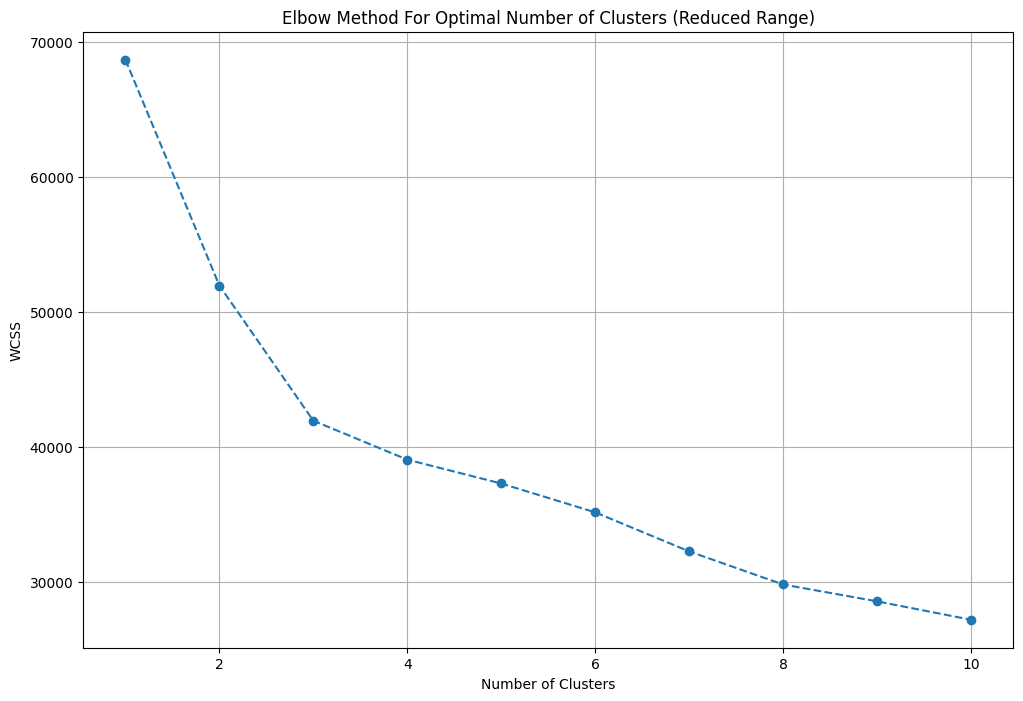

In [ ]:
# Plot the results
# Plotting the elbow curve
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

From the elbow curve, we can assume the number of clusters to be 3.

In [42]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [43]:
data = data.iloc[:,:-18]

In [44]:
data['furnishing_type'] = cluster_assignments

In [45]:
data.sample(5)[['furnishDetails','furnishing_type']]

,furnishDetails,furnishing_type
3766,"['1 Exhaust Fan', '5 Geyser', '7 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2
1936,"['7 Fan', '1 Fridge', '1 Exhaust Fan', '5 Geyser', '51 Light', '1 Modular Kitchen', '6 AC', '1 Chimney', '4 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No Stove', 'No TV', 'No Water Purifier']",0
1638,NaN,2
1397,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2
2511,"['8 Fan', '7 Light', '5 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2


 0 -> unfurnished

 1 -> semifurnished
 
 2 -> furnished

### **feature column**

In [52]:
data[['society','features']].sample(5)

,society,features
3299,ramprastha the edge towers,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
607,conscient heritage max,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center']"
1630,orchid petals,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2293,independent,NaN
304,housing board colony,"['Water Storage', 'Park', 'Rain Water Harvesting']"


In [53]:
# checking the missing values
data['features'].isnull().sum()

np.int64(635)

In [57]:
# loading the appartments dataframe
appartment_df = pd.read_csv('../data/appartments.csv')
appartment_df.sample(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
156,Orris Woodview Residencies,"Land in Sector 89, Gurgaon","['Bamroli Cricket Ground', 'Pataudi Road', 'Sanskar Jyoti School', 'Dwarka Expressway', 'City Square']","{'Bamroli Cricket Ground': '1Km', 'Pataudi Road': '1Km', 'Sanskar Jyoti School': '1.1Km', 'Dwarka Expressway': '3Km', 'City Square': '3.2Km', 'Garhi Harsaru Junction': '4.3Km', 'Arc Multi Speciality Hospital': '4.3Km', 'NH-48': '5.1Km', 'SGT University': '10.1Km'}",https://www.99acres.com/orris-woodview-residencies-sector-89-gurgaon-npxid-r136297,"{'Land': {'building_type': '', 'area_type': 'Plot Area', 'area': '1,620 - 6,030 sq.ft.', 'price-range': '₹ 1.92 - 4.26 Cr'}}","['Earthquake Resistant', 'Vastu Compliant', 'Yoga/Meditation Area', 'Indoor Games', 'Sewage Treatment Plant', 'CCTV Camera Security', 'Jogging Track', 'Rain Water Harvesting', '24x7 Security']"
120,Godrej Nature Plus,"2, 3 BHK Apartment in Sector-33 Sohna, Gurgaon","['K. R. Mangalam University', 'Badshahpur Sohna Rd Hwy', 'Gurjar Samrat Jaipal Khatana Marg', 'Signature Global Infinity Mall Sohna', 'Vidya Niketan Sr Sec School']","{'K. R. Mangalam University': '1.1 KM', 'Badshahpur Sohna Rd Hwy': '1.7 KM', 'Gurjar Samrat Jaipal Khatana Marg': '2.3 KM', 'Signature Global Infinity Mall Sohna': '2.3 KM', 'Vidya Niketan Sr Sec School': '4.7 KM', 'Sanjivani Hospital': '7 KM', 'Garhi Harsaru Junction': '30.5 KM', 'Indira Gandhi Intl Airport': '35.6 KM'}",https://www.99acres.com/godrej-nature-plus-sector-33-sohna-gurgaon-npxid-r297055,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '822.79 - 1,928 sq.ft.', 'price-range': '₹ 1.1 - 2.58 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '925.7 - 2,000 sq.ft.', 'price-range': '₹ 1.25 - 2.7 Cr'}}","['Natural Pond', 'Swimming Pool', 'Skating Rink', 'Gazebo', 'Cafeteria', 'Billiards', 'Fountain', 'Shopping Centre', 'Cricket Pitch']"


In [58]:
appartment_df['PropertyName'] = appartment_df['PropertyName'].str.lower()

In [60]:
# creating a temp_df having missing values of features in original data
temp_df = data[data['features'].isnull()]

In [61]:
# shape of temp_df
temp_df.shape

(635, 26)

In [64]:
# merging the appartment_df to temp_df
x = temp_df.merge(appartment_df, how='left', left_on='society', right_on='PropertyName')['TopFacilities']

In [66]:
data.loc[temp_df.index, 'features'] = x.values

In [67]:
data['features'].isnull().sum()

np.int64(481)

There are 130 unique entitites in the feature columns. Thus creating 130 columns having binary values for the presence or absence of that entity/faeture.

In [69]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [70]:
# Convert the string representation of lists in the 'features' column to actual lists
data['features_list'] = data['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(data['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [72]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2687,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
2004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
587,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3292,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1654,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [68]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}

In [73]:
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [74]:
data['luxury_score'] = luxury_score

In [75]:
data.head(2)

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,house,independent,sector 50,5.00,215517.0,232.0,Plot area 2(1011.71 sq.m.),6,5,3+,"pooja room,study room,servant room,others",2.0,not available,New Property,"['Standard chartered ATM', 'Icici bank ATM', 'Vatsalya Clinic', 'Bones Clinic - Orthopaedics', 'Meher Clinic', 'Dr. Naresh Pandita', 'Dr. Anuj Sharma', 'Vishesh Dental', 'Skin Clinic', 'Neelkanth Health Care', 'Park Hospital Gurgaon', 'Divine Look Clinic Centre', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Best Urologist Atcomplete Family Clinic', 'Sukhmani Hospital Pvt. Ltd', 'Ekta Hospital', 'Sai Heart and Trauma Center', 'Wembley estate club', 'Genius', 'Gardian Pharmacy', 'Apollo Pharmacy', 'SPAZE BUSINESS PARK', 'Unitech', 'India Oil', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'Indusind bank', 'Hdfc bank', 'SRS Cinemas', 'India', 'Madison and Pike', 'Haldiram', ""Domino's Pizza"", ""Nirula's"", 'Starbucks', 'Nook', 'Kamla International', 'Gurugram University', 'Delhi Public School Primary Section', 'Amity Global School', 'Manav Rachna School', 'Manav Rachna Swimming Pool']","['1 Fan', '1 Exhaust Fan', '1 Dining Table', '1 Geyser', '1 Light', '1 AC', '1 Chimney', '1 Curtains', '1 TV', '1 Wardrobe', '1 Microwave', 'No Bed', 'No Modular Kitchen', 'No Fridge', 'No Sofa', 'No Stove', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,2.0,NaN,1,1,0,1,1,1,[],0
1,flat,dlf regal gardens,sector 90,1.29,1430.0,9020.0,Super Built up area 1702(158.12 sq.m.)Built Up area: 1540 sq.ft. (143.07 sq.m.)Carpet area: 1430 sq.ft. (132.85 sq.m.),3,3,3,study room,7.0,East,Relatively New,"['SS Omnia, Sector 86', 'Numberdar market, IMT Manesar', ""Sodhi's Supermarket, Sector 82"", 'RPS International School', 'RHM Public School', 'ICICI Bank ATM, Sector 86', 'Silver Streak Multi Speciality', 'Aarvy Healthcare Super Speciality', 'Miracles Apollo Cradle Hospital', 'HDFC Bank, Pataudi Rd', 'Canara Bank - Nawada Fatehpur', 'State Bank of India', 'Minda Industries Nawada Fatehpur', 'Holiday Inn Gurugram Sector 90', 'M3M SCO Shop cum Office']",NaN,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1702.0,1540.0,1430.0,1,0,0,0,0,2,"[Centrally Air Conditioned, Water purifier, Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",174


In [76]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
data.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)


In [77]:
data.sample(5)

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2584,house,ashok vihar phase iii extension,sector 3 phase 3 extension,0.40,450.0,8889.0,Plot area 50(41.81 sq.m.),7,4,3+,4.0,not available,New Property,NaN,450.0,NaN,0,0,0,1,0,2,7
3031,flat,tulip violet,sector 69,1.19,1350.0,8814.0,Carpet area: 1350 (125.42 sq.m.),2,3,1,0.0,West,Relatively New,NaN,NaN,1350.0,1,0,0,0,0,1,174
1948,flat,smartworld one dxp,sector 113,2.00,1806.0,11074.0,Built Up area: 1806 (167.78 sq.m.)Carpet area: 1350 sq.ft. (125.42 sq.m.),3,3,3,12.0,North,Undefined,NaN,1806.0,1350.0,0,0,0,0,0,2,70
2484,flat,bestech park view grand spa,sector 81,4.20,4200.0,10000.0,Super Built up area 4200(390.19 sq.m.)Carpet area: 2900 sq.ft. (269.42 sq.m.),4,4,3+,25.0,South,Relatively New,4200.0,NaN,2900.0,0,1,0,0,0,1,90
1114,flat,tulip violet,sector 69,1.70,2016.0,8432.0,Super Built up area 2010(186.74 sq.m.),4,4,2,10.0,South,New Property,2010.0,NaN,NaN,0,0,0,0,0,2,125


In [78]:
data.shape

(3815, 23)

In [81]:
data.to_csv('../data/gurgaon_properties_cleaned(round2).csv',index=False)